In [1]:
from birdbrain.atlas import atlas
from birdbrain.utils import um_to_vox
import numpy as np
from birdbrain.visualization.plotting_2d import widget_controllers_2d

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


### Load data, create atlas object

In [2]:
regions_to_smooth = ['Arcopallium', 'Auditory1', 'Auditory2', 'Olfactory',
       'Somatosensory_spinal_system_and_body_representation',
       'Somatosensory_trigeminal', 'Somatosensory_wulst', 'Visual_aos',
       'Visual_isthmic', 'Visual_thalamofugal', 'Visual_wulst'] + ['Brain']

In [3]:
dset_dir = '../../data/processed/pigeon/'

pigeon_atlas = atlas(
    species = 'pigeon',
    dset_dir = dset_dir,
    um_mult = 1,
    smoothing = regions_to_smooth,
    updated_y_sinus = [0, 0, 0]
)

Data already download
Getting voxel data from .img files...


Getting location for each nucleus/region from voxel data...


Atlas created


In [9]:
pigeon_atlas.voxel_data[['type_']]

,type_
Slu-ipc-imc-left,Slu-ipc-imc-left
Rotundus,Rotundus
Tectum-right,Tectum-right
Wulst_ha_hi_hd-frontal-from-a13,Wulst_ha_hi_hd-frontal-from-a13
Gld-and-rotundus,Gld-and-rotundus
Nbor-lentiformis-mesencephali,Nbor-lentiformis-mesencephali
Isthmo-opticus,Isthmo-opticus
Gc_dlp_diva,Gc_dlp_diva
Entopallium,Entopallium
Prv-and-basalis,Prv-and-basalis


In [4]:
# The T2 voxels in this dataset are not the same as the delineations for some reason... as a temporary fix I just cut off 1 voxel...
pigeon_atlas.voxel_data.loc['T2', 'voxels'] = pigeon_atlas.voxel_data.loc['T2', 'voxels'][:,:,1:]

In [5]:
# the only delineation for zebra finch is nuclei
print(np.unique(list(pigeon_atlas.brain_labels.type_)))
print(np.unique(list(pigeon_atlas.brain_labels.index)))

['Arcopallium' 'Auditory1' 'Auditory2' 'Olfactory'
 'Somatosensory_spinal_system_and_body_representation'
 'Somatosensory_trigeminal' 'Somatosensory_wulst' 'Visual_aos'
 'Visual_isthmic' 'Visual_thalamofugal' 'Visual_wulst']
['Angularis' 'Arcopallium MLd' 'Basalis' 'Cortex piriformis'
 'Cortex prepiriformis' 'Cuneatus Gracilis' 'DIVA' 'DLP' 'Field L2'
 'GLd_left' 'GLd_right' 'Globus pallidus' 'HA' 'HI - HD' 'HI -HD' 'Imc'
 'Ipc' 'LLd' 'LLv' 'Laminaris' 'Lentiformis mesencephali'
 'Magnocellularis' 'N. taeniae amygdala (see olfactory system)'
 'Olfactory Bulb' 'Oliva superior' 'Ovoidalis' 'PrV' 'Rotundus' 'SLu'
 'Striatum' 'nBOR']


In [6]:
# all of the different subsets of delineations available 
all_r2p = np.unique(pigeon_atlas.region_vox.type_)
all_r2p

array(['Arcopallium', 'Auditory1', 'Auditory2', 'Olfactory',
       'Somatosensory_spinal_system_and_body_representation',
       'Somatosensory_trigeminal', 'Somatosensory_wulst', 'Visual_aos',
       'Visual_isthmic', 'Visual_thalamofugal', 'Visual_wulst'],
      dtype=object)

{'medial-lateral': 0, 'anterior-posterior': 0, 'dorsal-ventral': 0}


FloatSlider(value=0.0, description='medial-lateral:', max=10080.0, min=-10320.0, step=100.0)

FloatSlider(value=0.0, description='posterior-anterior:', max=18240.0, min=-6320.0, step=100.0)

FloatSlider(value=0.0, description='ventral-dorsal:', max=17600.0, min=-2200.0, step=100.0)

Dropdown(description='Region:', index=32, options=('Striatum', 'Globus pallidus', 'N. taeniae amygdala (see ol…

Button(description='Generate graph', style=ButtonStyle())

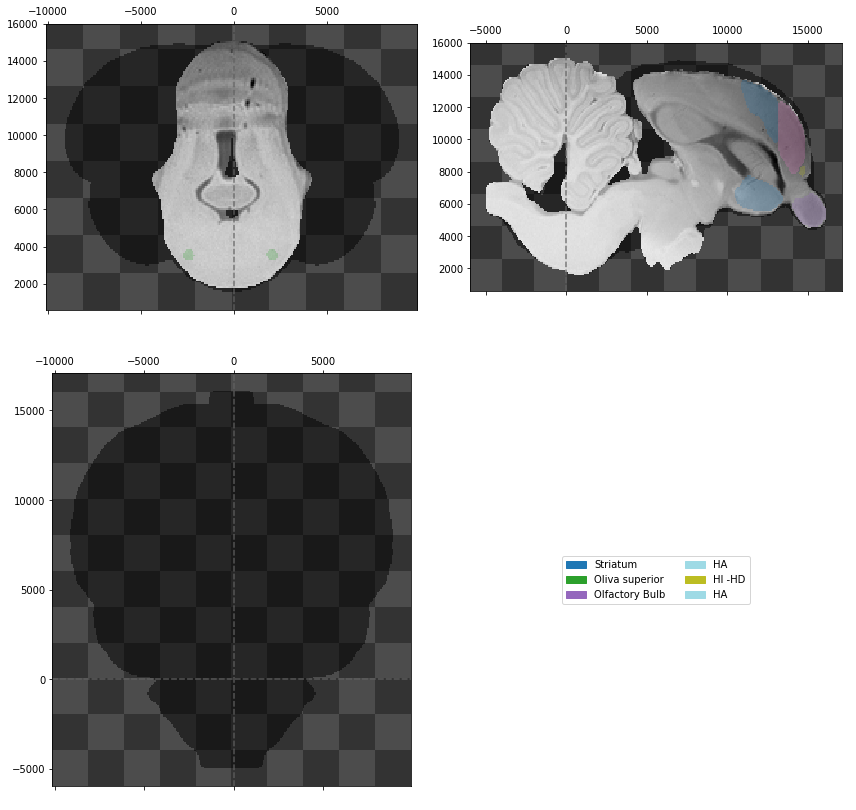

In [7]:
widget_controllers_2d(pigeon_atlas, regions_to_plot=all_r2p, brain_masked_image='T2');